In [103]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input

In [104]:
import matplotlib.pyplot as plt
import numpy as np

In [105]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

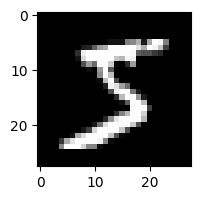

In [106]:
plt.figure(figsize=(2,2))
plt.imshow(xtrain[0])
plt.gray()
plt.show()

In [107]:
# xtrain_0 = np.where(xtrain[0] != 0, 255, xtrain[0])

# plt.figure(figsize=(2,2))
# plt.imshow(xtrain_0)
# plt.gray()
# plt.show()

In [108]:
xtrain = xtrain.reshape(xtrain.shape[0], 28*28)
xtest = xtest.reshape(xtest.shape[0], 28*28)

xtrain = xtrain/255
xtest = xtest/255


In [109]:
# DEFINE LAYERS
Input_layer = Input(shape = xtrain.shape[1],
                    name = 'inpuit')
latent_layer = Dense(units =32,
                     activation = 'LeakyReLU',
                     name = 'latent')(Input_layer)
output = Dense(units = xtrain.shape[1],
               activation = 'sigmoid',
               name = 'output')(latent_layer)

# DEFINE AUTOENCODER
autoencoder = Model(Input_layer, output)

# DEFINE ENCODER
encoder = Model(Input_layer, latent_layer)

# DEFIEN DECODER
decoder_in  = Input(shape = latent_layer.shape[1],
                       name = 'decoder_input')
decoder_out = autoencoder.layers[-1](decoder_in)
decoder = Model(decoder_in, decoder_out)

In [110]:
# autoencoder.summary()

In [111]:
# encoder.summary()

In [112]:
# decoder.summary()

In [113]:
# COMPILE AND TRAIN
autoencoder.compile(optimizer = 'adam', loss = 'mse')
history = autoencoder.fit(xtrain,
                          xtrain,
                          epochs = 20,
                          batch_size = 128,
                          shuffle=True,
                          validation_data=(xtest, xtest))

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0574 - val_loss: 0.0339
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0271 - val_loss: 0.0212
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0186 - val_loss: 0.0157
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0145 - val_loss: 0.0128
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0124 - val_loss: 0.0113
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0114 - val_loss: 0.0107
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0106 - val_loss: 0.0102
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0105 - val_loss: 0.0101
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0104 - val_loss: 0.0100

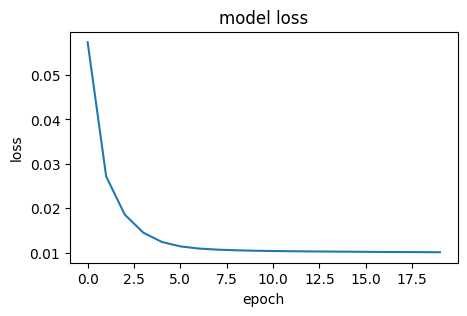

In [120]:
# PLOT TRAINING ERROR
plt.figure(figsize=(5,3))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [115]:
# ENCODE AND RECONSTRUCT TEST DATA
encoded_data = encoder.predict(xtest, batch_size = 128) # encode test data to latent dimension
decoded_data = decoder.predict(encoded_data, batch_size = 128) # reconstruct test data from latent dimension
print(encoded_data.shape, decoded_data.shape)

# RESHAPE 1-DIMENSIONAL 'ORIGINAL' AND 'DECODED' TEST DATA TO 2-DIMENSIONAL DATA
decoded_data = decoded_data.reshape(decoded_data.shape[0], 28, 28)
xtest =xtest.reshape(xtest.shape[0], 28, 28)
print(decoded_data.shape, xtest.shape)


79/79 [==============================] - 0s 2ms/step
(10000, 32) (10000, 784)
(10000, 28, 28) (10000, 28, 28)


Actual
Reconstructed


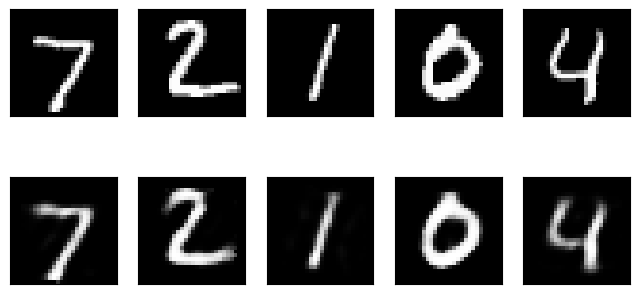

In [116]:
# VISUALIZE ACTUAL AND RECONSTRUCTED DATA
n = 5
plt.figure(figsize=(8, 4))
print('Actual')
print('Reconstructed')
for i in range(n):
    # ACTUAL TEST DATA
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_data[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
